## Information Retrieval and Web Analytics
## Part 1: Text Processing and Exploratory Data Analysis

### Text Processing

Team:
- Edith Ruiz, 242324
- Montserrat Sumoy, 241061
- Martina Tarres, 242828


**1) As a first step, you must pre-process the documents by**
- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [1]:
# Mount your google drive account here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
from datetime import datetime
import numpy as np
import collections
from numpy import linalg as la
import time
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [4]:
# Path to the json data file
# Change the path acording to your folders distribution to get file "Rus_Ukr_war_data.json"
docs_path = '/content/drive/MyDrive/uni/Recuperacio Informacio/IRWA - Labs/IRWA_data_2023/Rus_Ukr_war_data.json'

with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

data = [json.loads(line) for line in open(docs_path, 'r')]

In [5]:
print("Total number of Tweets articles in the corpus: {}".format(len(lines)))

Total number of Tweets articles in the corpus: 4000


**PRE-PROCESS THE DOCUMENT**

In [6]:
def build_terms(line):

  stemmer = PorterStemmer()
  stop_words = set(stopwords.words('english'))
  line = line.lower()
  line = re.sub('http[s]?://\S+', '', line)            # Bonus: Remove urls
  line = re.sub('[\W_]+', ' ', line)                   # Bonus: Remove emojis, symbols...
  line = line.split()                                  # Tokenize the text to get a list of terms
  line = [x for x in line if x not in stop_words]      # Eliminate the stopwords
  line = [stemmer.stem(word) for word in line]         # Perform stemming

  return line

In [7]:
processed_data = []  # Create a list to store processed data

for i, tweet in enumerate(data):
    # Create a new dictionary for processed data
    processed_tweet = {}

    # Process and update the fields
    processed_tweet['Tweet'] = build_terms(tweet['full_text'])
    processed_tweet['Username'] = re.sub('[\W_]+', ' ', tweet['user']['name'])
    processed_tweet['Date'] = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S %z %Y')
    processed_tweet['Hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    processed_tweet['Likes'] = tweet['favorite_count']
    processed_tweet['Retweets'] = tweet['retweet_count']
    processed_tweet['Url'] = tweet['entities']['media'][0]['url'] if tweet['entities'].get('media') else {}

    # Append the processed data to the list
    processed_data.append(processed_tweet)

    # Print both UNPROCESSED and PROCESSED data for the first 3 tweets
    if i < 3:
        print('\033[1m' + 'UNPROCESSED' + '\033[0m')
        print("{'Tweet':", repr(tweet['full_text']),
              "'Username':", repr(tweet['user']['name']),
              "'Date':", repr(tweet['created_at']),
              "'Hashtags':", repr(tweet['entities']['hashtags']),
              "'Likes':", repr(tweet['favorite_count']),
              "'Retweets':", repr(tweet['retweet_count']),
              "'Url':", repr(tweet['entities']['media'][0]['url'] if tweet['entities'].get('media') else {}),
              "}")

        print('\033[1m' + 'PROCESSED' + '\033[0m')
        print(processed_tweet, '\n')

# Update the original data with the processed data
data = processed_data


UNPROCESSED
{'Tweet': "@MelSimmonsFCDO Wrong. Dictator Putin's Fascist Russia intends to conquer as much Ukrainian Land as possible.\n#RussiainvadesUkraine\n#UkraineRussiaWar" 'Username': 'Lyn Wood🌹🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f☮️🇺🇦🌻🌹' 'Date': 'Fri Sep 30 18:39:17 +0000 2022' 'Hashtags': [{'text': 'RussiainvadesUkraine', 'indices': [110, 131]}, {'text': 'UkraineRussiaWar', 'indices': [132, 149]}] 'Likes': 0 'Retweets': 0 'Url': {} }
PROCESSED
{'Tweet': ['melsimmonsfcdo', 'wrong', 'dictat', 'putin', 'fascist', 'russia', 'intend', 'conquer', 'much', 'ukrainian', 'land', 'possibl', 'russiainvadesukrain', 'ukrainerussiawar'], 'Username': 'Lyn Wood ', 'Date': datetime.datetime(2022, 9, 30, 18, 39, 17, tzinfo=datetime.timezone.utc), 'Hashtags': ['RussiainvadesUkraine', 'UkraineRussiaWar'], 'Likes': 0, 'Retweets': 0, 'Url': {}} 

UNPROCESSED
{'Tweet': '🇺🇦❤️ The Armed Forces liberated the village of #Drobysheve of the #Lymansk urban territorial community in #Done

In [8]:
# Path to the data csv file
# Change the path acording to your folders distribution to get file "Rus_Ukr_war_data_ids.csv"
path_ids = '/content/drive/MyDrive/uni/Recuperacio Informacio/LAB 1/IRWA_data_2023/Rus_Ukr_war_data_ids.csv'

In [9]:
df = pd.DataFrame.from_dict(data)
doc_ids = pd.read_csv('Rus_Ukr_war_data_ids.csv', names=['doc_id']) # Reading the tweet_document_ids_map
df_final = pd.merge(doc_ids, df, left_index=True, right_index=True) # Mapping the tweets with the document ids
df_final

,doc_id,Tweet,Username,Date,Hashtags,Likes,Retweets,Url
0,doc_1\t1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Lyn Wood,2022-09-30 18:39:17+00:00,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,{}
1,doc_2\t1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Feher Junior,2022-09-30 18:38:44+00:00,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,https://t.co/ifg0RXDMBQ
2,doc_3\t1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",NEWS ALL TIME,2022-09-30 18:38:23+00:00,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,{}
3,doc_4\t1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Magz Prestige,2022-09-30 18:38:03+00:00,"[Putin, UkraineRussiaWar]",0,0,{}
4,doc_5\t1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",t3zx9kc7rs1,2022-09-30 18:37:56+00:00,"[European, UkraineRussiaWar]",0,0,{}
...,...,...,...,...,...,...,...,...
3995,doc_3996\t1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Irish Daily Mirror,2022-09-28 16:05:00+00:00,[UkraineRussiaWar],4,1,https://t.co/Ld9SN2pz25
3996,doc_3997\t1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Kaleva π,2022-09-28 16:04:19+00:00,"[germany, UkraineRussiaWar]",0,0,{}
3997,doc_3998\t1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Oigetit Business,2022-09-28 16:04:18+00:00,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,https://t.co/uI4jNf1n18
3998,doc_3999\t1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Yusuf Adam,2022-09-28 16:03:56+00:00,[UkraineRussiaWar],13,2,https://t.co/XQOJq8b3M1


### Exploratory Data Analysis

#####BASIC STATISTICS

In [10]:
# Calculate the number of tweets and users
num_tweets = len(df_final)
num_users = len(df_final['Username'].unique())

# Calculate the distribution of likes and retweets
likes_distribution = df_final['Likes'].describe()
retweets_distribution = df_final['Retweets'].describe()

# Determine the range of dates in your dataset
min_date = df_final['Date'].min()
max_date = df_final['Date'].max()

# Print the basic statistics
print(f"Number of Tweets: {num_tweets}")
print(f"Number of Users: {num_users}")
print("\nLikes Distribution:")
print(likes_distribution)
print("\nRetweets Distribution:")
print(retweets_distribution)
print(f"\nTimeframe: {min_date} to {max_date}")


Number of Tweets: 4000
Number of Users: 1326

Likes Distribution:
count    4000.000000
mean       11.436250
std       100.265304
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      3701.000000
Name: Likes, dtype: float64

Retweets Distribution:
count    4000.000000
mean        2.123000
std        15.828361
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       646.000000
Name: Retweets, dtype: float64

Timeframe: 2022-09-28 16:03:38+00:00 to 2022-09-30 18:39:17+00:00


#####LIKES DISTRIBUTION

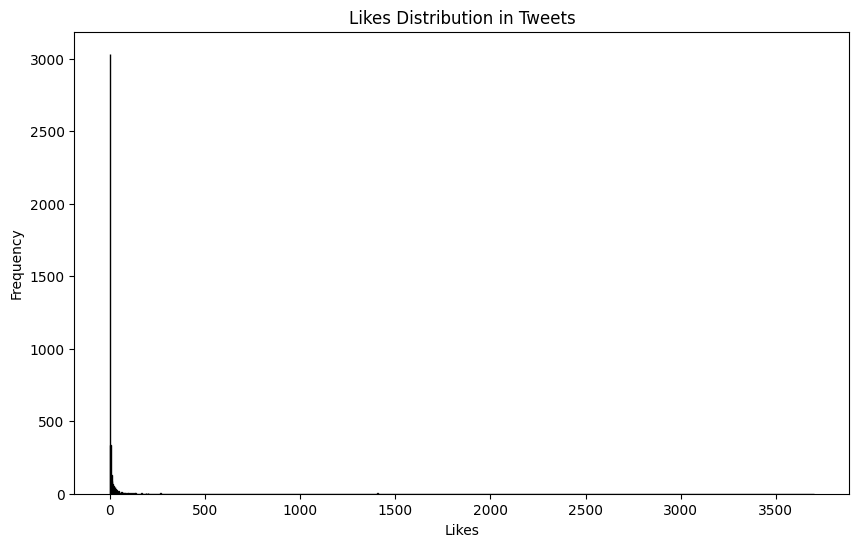

In [11]:
# Create a histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(df_final['Likes'], bins = 1000, color='pink', edgecolor= 'k')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Likes Distribution in Tweets')
plt.show()

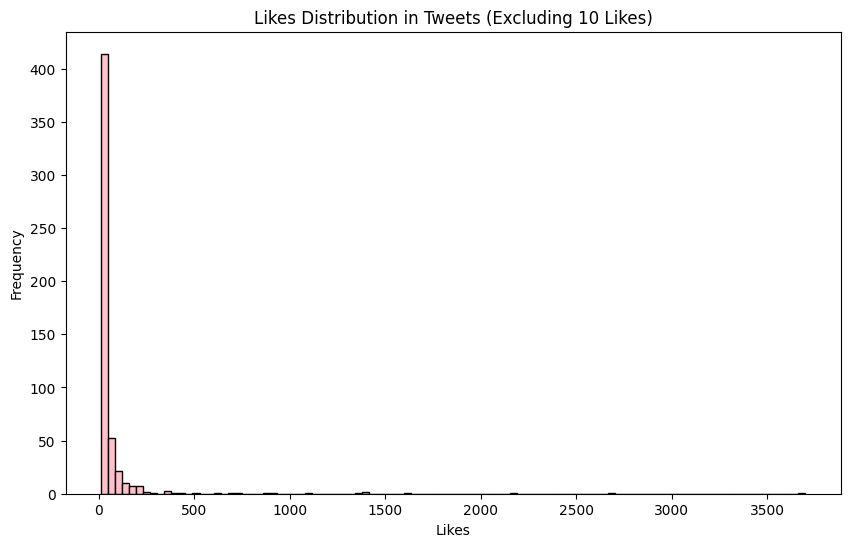

In [12]:
df_final_filtered = df_final[df_final['Likes'] > 10]

# Create a histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(df_final_filtered['Likes'], bins=100, color='pink', edgecolor='k')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Likes Distribution in Tweets (Excluding 10 Likes)')
plt.show()

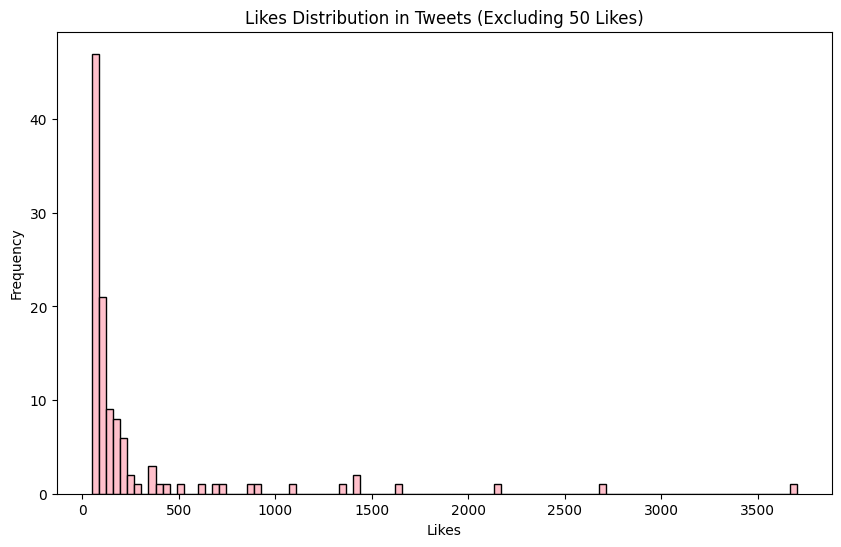

In [13]:
df_final_filtered = df_final[df_final['Likes'] > 50]

# Create a histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(df_final_filtered['Likes'], bins=100, color='pink', edgecolor='k')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Likes Distribution in Tweets (Excluding 50 Likes)')
plt.show()

#####RETWEET DISTRIBUTION

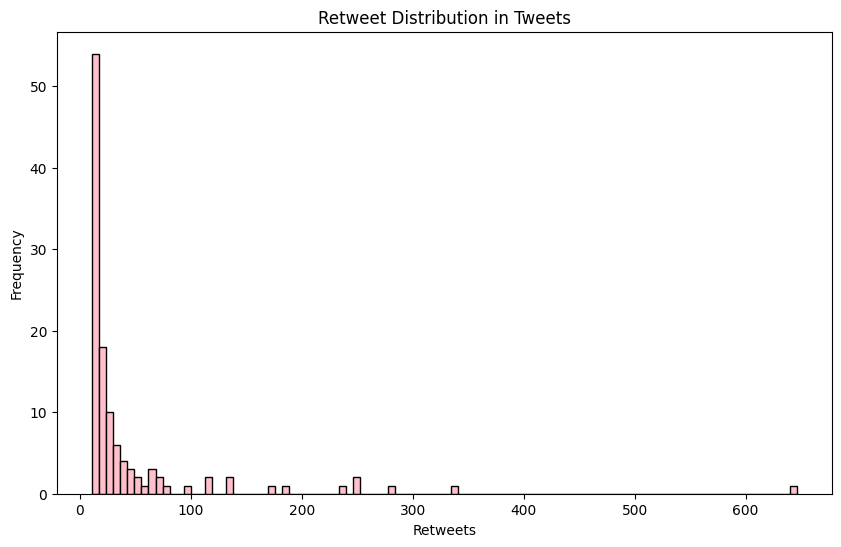

In [14]:
df_final_filtered = df_final[df_final['Retweets'] > 10]

# Create a histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(df_final_filtered['Retweets'], bins = 100, color='pink', edgecolor= 'k')
plt.xlabel('Retweets')
plt.ylabel('Frequency')
plt.title('Retweet Distribution in Tweets')
plt.show()

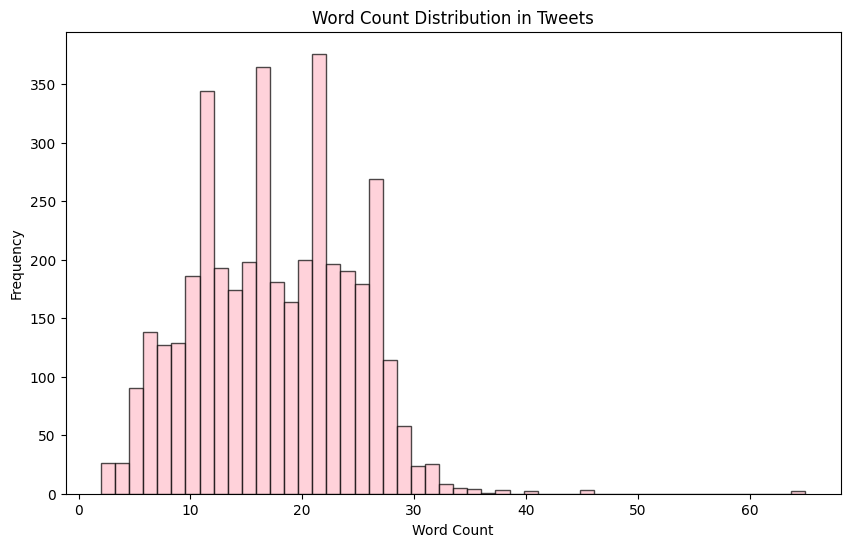

In [15]:


# Function to calculate word counts in a tweet
def word_count(tweet):
    return len(tweet)

# Calculate word counts for each tweet and add it as a new column
df_final['Word Count'] = df_final['Tweet'].apply(word_count)

# Create a histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(df_final['Word Count'], bins=50, alpha=0.7, color='pink', edgecolor= 'k')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution in Tweets')
plt.show()


#####TOP RETWTEETED TWEETS

In [16]:
top_tweets = df_final.sort_values(by='Retweets', ascending=False)
N = 10
top_N_tweets = top_tweets.head(N)

top_N_tweets


,doc_id,Tweet,Username,Date,Hashtags,Likes,Retweets,Url,Word Count
1219,doc_1220\t1575775162674212865,"[situat, around, lyman, sep, 30, 11, 00, ua, f...",MilitaryLand net,2022-09-30 09:10:49+00:00,[UkraineRussiaWar],3701,646,https://t.co/jGJUhXcr1y,28
2813,doc_2814\t1575396903252025351,"[uniqu, rare, photo, ukrainian, forward, comma...",MilitaryLand net,2022-09-29 08:07:45+00:00,"[Kharkiv, UkraineRussiaWar]",2685,338,https://t.co/AmSijyM59c,18
3765,doc_3766\t1575181552170201088,"[oper, interflex, ukrainian, recruit, continu,...",MilitaryLand net,2022-09-28 17:52:02+00:00,[UkraineRussiaWar],2155,283,https://t.co/oYWThs8qNe,13
1846,doc_1847\t1575625313446289409,"[follow, countri, urg, citizen, leav, updat, g...",Intelschizo,2022-09-29 23:15:23+00:00,"[UkraineRussiaWar, AnnexationofUkraine, NAFO]",923,251,{},24
1387,doc_1388\t1575742923068813314,"[russian, shell, outskirt, zaporizhzhia, hit, ...",MilitaryLand net,2022-09-30 07:02:43+00:00,"[Zaporizhzhia, UkraineRussiaWar]",694,247,https://t.co/365j43jy51,18
1209,doc_1210\t1575778551248605184,"[war, end, call, annex, referendum, genuin, ex...",Cyber Martians New blood Joining,2022-09-30 09:24:17+00:00,"[Ukraine, UkraineRussiaWar, NFTs]",270,236,https://t.co/yfZAeV7K8d,18
1532,doc_1533\t1575686562616004609,"[russia, may, drop, 11, meter, long, x, 22, mi...",UkraineNews,2022-09-30 03:18:46+00:00,"[Dnipro, NATORussiaWar, UkraineRussiaWar, Kher...",713,184,https://t.co/NuRQPVMzkJ,28
205,doc_206\t1575896773511434240,"[ukrainian, forc, liber, drobyshev, donetsk, o...",MilitaryLand net,2022-09-30 17:14:04+00:00,"[Donetsk, UkraineRussiaWar]",1407,171,https://t.co/7wUCdcA7NZ,7
2118,doc_2119\t1575559188079845376,"[kostyantyn, nemichev, command, kraken, specia...",MilitaryLand net,2022-09-29 18:52:37+00:00,[UkraineRussiaWar],1407,136,https://t.co/vpQcmL92q7,22
3801,doc_3802\t1575178643772297216,"[ukrainian, paratroop, btr, 3, offens, kharkiv...",MilitaryLand net,2022-09-28 17:40:28+00:00,"[Kharkiv, Donetsk, UkraineRussiaWar]",1348,133,https://t.co/00LrzsG7QO,9


#####WORD CLOUDS

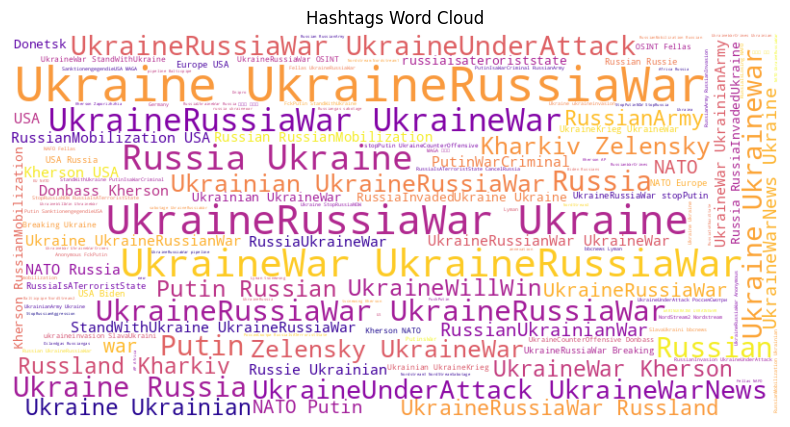

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_hashtags = []

for hash_list in df_final['Hashtags']:
    all_hashtags.extend(hash_list)

hashtags_text = ' '.join(all_hashtags)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(hashtags_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags Word Cloud')
plt.show()


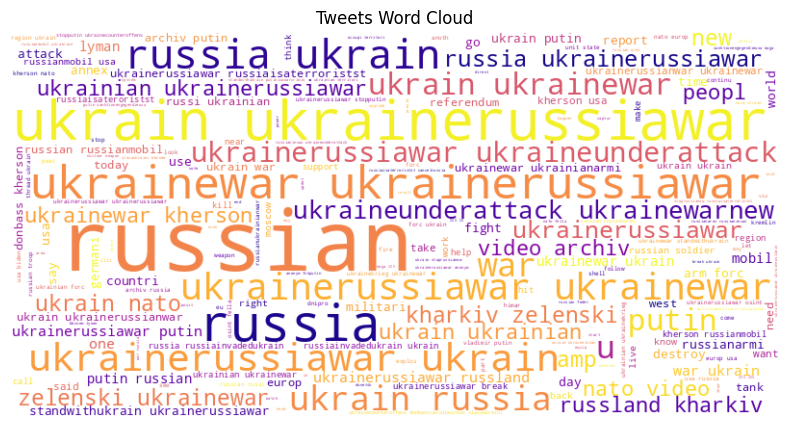

In [18]:

all_tweets = []

for tweets_list in df_final['Tweet']:
    all_tweets.extend(tweets_list)

hashtags_text = ' '.join(all_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(hashtags_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tweets Word Cloud')
plt.show()


#####USER ANALYSIS

In [19]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'Username'
# If not, you can use your existing 'lines' list and create a DataFrame as mentioned in a previous response

# Calculate the distribution of users
user_distribution = df_final['Username'].value_counts()

# Calculate and display the top users by tweet count
top_users_by_tweet_count = df_final.groupby('Username')['Tweet'].count().reset_index()
top_users_by_tweet_count = top_users_by_tweet_count.sort_values(by='Tweet', ascending=False)
print("\nTop Users by Tweet Count:")
print(top_users_by_tweet_count.head(10))  # Display the top 10 users



Top Users by Tweet Count:
                                Username  Tweet
1001            Sue Stone standing with     212
8                          Danielle Vol     161
235                           Chronology    132
408     Fuck Putin Bot StandWithUkraine      82
0                                            76
956                        Shadi Alkasim     66
402   Free Army of Civilians in Ukraine      58
1040                         Tempo Dolok     55
736                        NEWS ALL TIME     55
1207                               ddlg      50


#####SENTIMENT ANALYSIS

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Convert the 'Tweet' column to strings
df_final['Tweet'] = df_final['Tweet'].apply(lambda tweet_list: ' '.join(tweet_list))

# Perform sentiment analysis and add the results to the DataFrame
df_final['Sentiment'] = df_final['Tweet'].apply(lambda tweet: analyzer.polarity_scores(tweet))

# Classify the sentiment as 'positive', 'negative', or 'neutral'
def classify_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_final['Sentiment'] = df_final['Sentiment'].apply(classify_sentiment)

# Print the sentiment analysis results
print(df_final[['Tweet', 'Sentiment']])


                                                  Tweet Sentiment
0     melsimmonsfcdo wrong dictat putin fascist russ...  negative
1     arm forc liber villag drobyshev lymansk urban ...   neutral
2     alert poland prep anti radiat tablet nuclear t...  negative
3     still wait googl map updat russia new annex te...   neutral
4     emmanuelmacron probabl right say anyway game e...  negative
...                                                 ...       ...
3995  ukrain presid warn russia sham referendum atte...  positive
3996  germani amusingli share day old intelligens uk...  positive
3997  us embassi moscow urg american leav russia soo...  negative
3998  stage fake referendum septemb 2022 russian for...  negative
3999  expect much differ bia right expect met thu fa...  positive

[4000 rows x 2 columns]


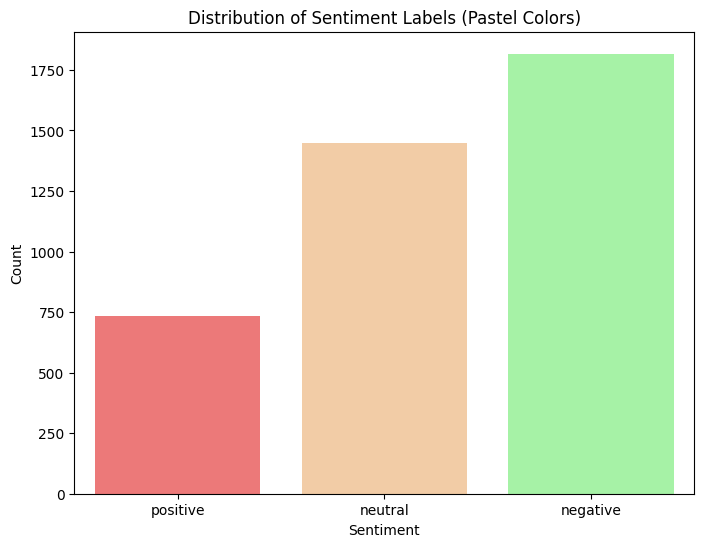

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'Sentiment' column in your DataFrame

# Define a pastel color palette
pastel_palette = ['#FF6666', '#FFCC99', '#99FF99']

# Create a countplot with the pastel color palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x='Sentiment', order=['positive', 'neutral', 'negative'], palette=pastel_palette)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels (Pastel Colors)')
plt.show()


